In [62]:
!pip install --upgrade pip
!pip install pandas numpy scikit-learn matplotlib seaborn plotly imbalanced-learn shap joblib
!pip install dask[complete] dask-ml distributed --quiet
!pip install streamlit pyngrok --quiet
!pip install dataframe_image --quiet


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [64]:
import kagglehub
from pathlib import Path

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [65]:
csv_files = list(Path(path).rglob("*.csv"))
df = pd.read_csv(csv_files[0])

In [66]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [67]:
print("Размер датасета:", df.shape)
display(df.head(5))
display(df.info())
display(df.describe(include='all').T)

Размер датасета: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


КОлиество пропусков

In [68]:
print("\nПропуски в колонках:")
print(df.isnull().sum())


Пропуски в колонках:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [69]:
if 'TotalCharges' in df.columns:

    df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
    print("После преобразования TotalCharges пропусков:", df['TotalCharges'].isna().sum())


После преобразования TotalCharges пропусков: 11


In [70]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nКатегориальные колонки и число уникальных значений:")
for c in cat_cols:
    print(c, ":", df[c].nunique())


Категориальные колонки и число уникальных значений:
customerID : 7043
gender : 2
Partner : 2
Dependents : 2
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
Churn : 2


Для числовых признаков- медиана
Для категориальных- наиболее частое значение\mode

In [71]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Числовые cols:", num_cols)
print("Категориальные cols:", cat_cols)


if 'TotalCharges' in df.columns:
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("\nПропусков после заполнения:")
print(df.isnull().sum())


Числовые cols: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Категориальные cols: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Пропусков после заполнения:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# **Data Visualisation**

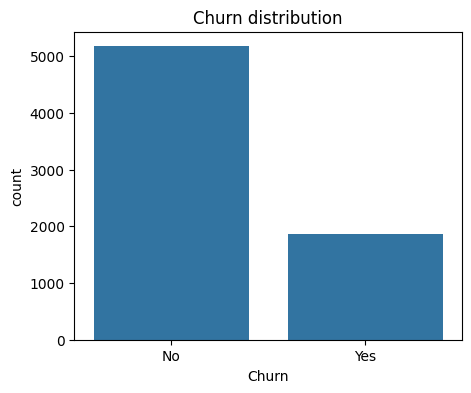

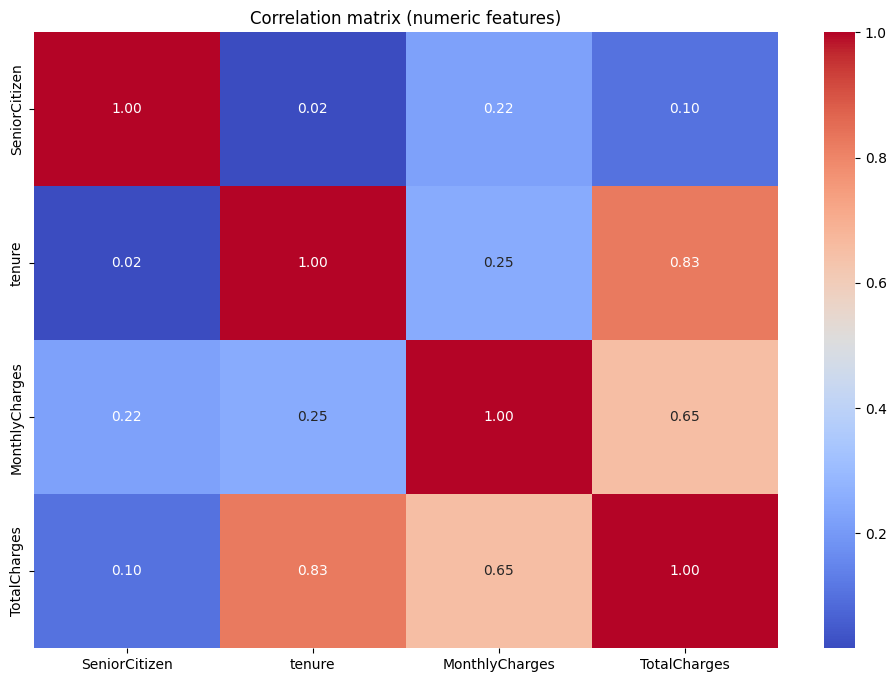

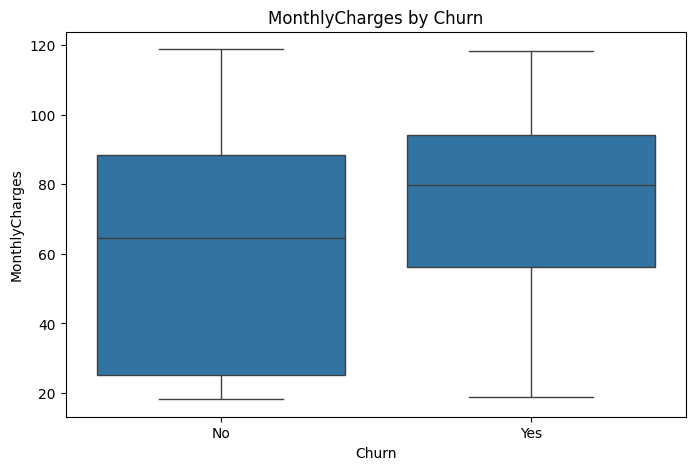

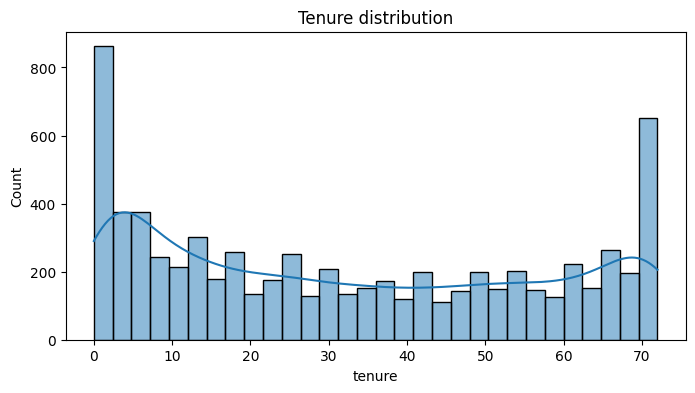

In [72]:
if 'Churn' in df.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x='Churn', data=df)
    plt.title('Churn distribution')
    plt.show()

# Корреляция
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) > 1:
    plt.figure(figsize=(12,8))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation matrix (numeric features)')
    plt.show()

# Сравнение MonthlyCharges по Churn
if 'MonthlyCharges' in df.columns and 'Churn' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
    plt.title('MonthlyCharges by Churn')
    plt.show()

# Распределение tenure
if 'tenure' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['tenure'], bins=30, kde=True)
    plt.title('Tenure distribution')
    plt.show()


# Feature Engineering

создание новых признаков

In [73]:
df_fe = df.copy()

# tenure_group
if 'tenure' in df_fe.columns:
    bins = [0, 6, 12, 24, 48, 72, np.inf]
    labels = ['0-6','7-12','13-24','25-48','49-72','73+']
    df_fe['tenure_group'] = pd.cut(df_fe['tenure'], bins=bins, labels=labels, include_lowest=True)

# total_per_month
if 'TotalCharges' in df_fe.columns and 'tenure' in df_fe.columns:
    df_fe['tenure_safe'] = df_fe['tenure'].replace(0, np.nan)
    df_fe['total_per_month'] = df_fe['TotalCharges'] / df_fe['tenure_safe']
    df_fe['total_per_month'] = df_fe['total_per_month'].fillna(df_fe['MonthlyCharges'])  # если tenure=0, допустим monthlycharges
    df_fe.drop(columns=['tenure_safe'], inplace=True)

#Yes/No в 1/0
yes_no_cols = [c for c in df_fe.columns if df_fe[c].dropna().isin(['Yes','No']).all()]
for c in yes_no_cols:
    df_fe[c + '_bin'] = df_fe[c].map({'Yes':1, 'No':0})
    # оставим оригинал, но теперь есть бинары

#
display(df_fe.head(3))


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,tenure_group,total_per_month,Partner_bin,Dependents_bin,PhoneService_bin,PaperlessBilling_bin,Churn_bin
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0-6,29.850000,1,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,25-48,55.573529,0,0,1,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,0-6,54.075000,0,0,1,1,1


# **Outliers**

числовые признаки для поиска выбросов
IsolationForest для пометки выбросов

In [74]:
num_cols = df_fe.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c not in ['SeniorCitizen']]  # SeniorCitizen бинарный

# IsolationForest для пометки выбросов
iso = IsolationForest(contamination=0.01, random_state=42)
iso.fit(df_fe[num_cols].fillna(0))
outlier_pred = iso.predict(df_fe[num_cols].fillna(0))
df_fe['is_outlier'] = (outlier_pred == -1).astype(int)

print("Число обнаруженных выбросов:", df_fe['is_outlier'].sum())

# пометить и при обучении учитывать
display(df_fe[['is_outlier'] + num_cols].head())


Число обнаруженных выбросов: 71


,is_outlier,tenure,MonthlyCharges,TotalCharges,total_per_month,Partner_bin,Dependents_bin,PhoneService_bin,PaperlessBilling_bin,Churn_bin
0,0,1,29.85,29.85,29.850000,1,0,0,1,0
1,0,34,56.95,1889.50,55.573529,0,0,1,0,0
2,0,2,53.85,108.15,54.075000,0,0,1,1,1
3,0,45,42.30,1840.75,40.905556,0,0,0,0,0
4,0,2,70.70,151.65,75.825000,0,0,1,1,1


# **Pipeline **
категориальные  числовые

In [75]:

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

print("scikit-learn version:", sklearn.__version__)

# OneHotEncoder
ohe_kwargs = {}
# в новых версиях используется sparse_output, в старых — sparse
if tuple(map(int, sklearn.__version__.split('.')[:2])) >= (1, 2):
    ohe_kwargs['sparse_output'] = False
else:
    ohe_kwargs['sparse'] = False

# таргет и признаки
target = 'Churn' if 'Churn' in df_fe.columns else None
if target is None:
    raise ValueError("В данных нет колонки 'Churn'. Укажи целевую колонку.")

features = [c for c in df_fe.columns if c not in [target, 'customerID']]

#числовые и категориальные признаки
num_features = df_fe[features].select_dtypes(include=[np.number]).columns.tolist()
cat_features = df_fe[features].select_dtypes(include=['object','category']).columns.tolist()

print("Числовые фичи:", num_features)
print("Категориальные фичи:", cat_features)

#трансформеры
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', **ohe_kwargs))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


scikit-learn version: 1.6.1
Числовые фичи: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'total_per_month', 'Partner_bin', 'Dependents_bin', 'PhoneService_bin', 'PaperlessBilling_bin', 'Churn_bin', 'is_outlier']
Категориальные фичи: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']


# **разделение данных и балансировка классов**

In [76]:
from sklearn.model_selection import train_test_split


df_model = df_fe.copy()
df_model[target] = df_model[target].map({'Yes':1, 'No':0})  # если Churn в Yes/No

X = df_model[features].copy()
y = df_model[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Class distribution in train:\n", y_train.value_counts(normalize=True))

# SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


Train: (5634, 27) Test: (1409, 27)
Class distribution in train:
 Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64


Логистическая регрессия и базовые метрики

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


from imblearn.pipeline import Pipeline as ImbPipeline

logreg = LogisticRegression(max_iter=1000, solver='saga')  # saga поддерживает L1,L2 и большие данные

pipeline_logreg = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', logreg)
])

pipeline_logreg.fit(X_train, y_train)

# Оценка на тесте
y_pred = pipeline_logreg.predict(X_test)
y_proba = pipeline_logreg.predict_proba(X_test)[:,1] if hasattr(pipeline_logreg.named_steps['clf'], "predict_proba") else None

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
if y_proba is not None:
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


Confusion matrix:
 [[1035    0]
 [   0  374]]


# **Random Forest+SNAP**

X_train_transformed shape: (5634, 57)
Number of feature names: 57


INFO:distributed.core:Event loop was unresponsive in Scheduler for 93.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


shap_vals_to_plot shape: (1000, 57, 2)
X_shap shape: (1000, 57)
Number of feature_names (final): 57


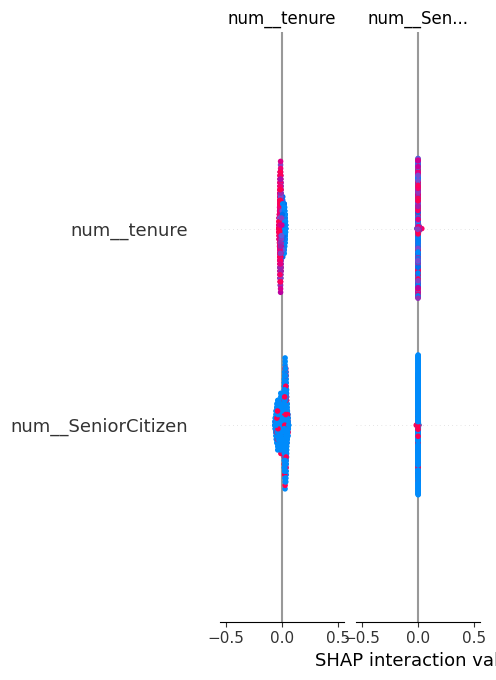

In [78]:
import shap
import pandas as pd
import numpy as np

MAX_SHAP_SAMPLES = 1000


preproc = pipeline_rf.named_steps['preprocessor']
model = pipeline_rf.named_steps['clf']

X_train_transformed = preproc.transform(X_train)  # numpy array или sparse matrix

def safe_get_feature_names(col_transformer):

    try:
        names = col_transformer.get_feature_names_out()
        return list(names)
    except Exception:
        pass


    try:
        names = get_feature_names(col_transformer)
        return list(names)
    except Exception:
        pass


    try:
        ncols = X_train_transformed.shape[1]
        return [f"f_{i}" for i in range(ncols)]
    except Exception:
        return []

feature_names = safe_get_feature_names(preproc)


print("X_train_transformed shape:", getattr(X_train_transformed, "shape", None))
print("Number of feature names:", len(feature_names))


if X_train_transformed.shape[1] != len(feature_names):
    print("Внимание: число feature_names != числу столбцов трансформированных данных.")
    print("Будем использовать автоматически сгенерированные имена.")
    feature_names = [f"f_{i}" for i in range(X_train_transformed.shape[1])]


n_shap = min(MAX_SHAP_SAMPLES, X_train_transformed.shape[0])
X_shap = X_train_transformed[:n_shap]


from scipy import sparse
if sparse.issparse(X_shap):
    X_shap = X_shap.toarray()


explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_shap)


if isinstance(shap_values, list) or isinstance(shap_values, tuple):
    _
    idx_class = 1 if len(shap_values) > 1 else 0
    shap_vals_to_plot = shap_values[idx_class]
else:
    shap_vals_to_plot = shap_values

print("shap_vals_to_plot shape:", getattr(shap_vals_to_plot, "shape", None))
print("X_shap shape:", getattr(X_shap, "shape", None))
print("Number of feature_names (final):", len(feature_names))

if shap_vals_to_plot.shape[1] != X_shap.shape[1] or shap_vals_to_plot.shape[1] != len(feature_names):
    print("ОШИБКА: число признаков в shap_values и X_shap/feature_names не совпадает.")
    print("shap.shape[1] =", shap_vals_to_plot.shape[1],
          "X_shap.shape[1] =", X_shap.shape[1],
          "len(feature_names) =", len(feature_names))

    raise ValueError("Несовпадение числа признаков между SHAP и данными. Проверь preprocessor/get_feature_names.")


X_shap_df = pd.DataFrame(X_shap, columns=feature_names)


shap.initjs()

shap.summary_plot(shap_vals_to_plot, X_shap_df)


# **Hyperparameter Tuning**

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
    'clf__n_estimators': sp_randint(50, 500),
    'clf__max_depth': [None, 5, 10, 20, 30],
    'clf__min_samples_split': sp_randint(2, 20),
    'clf__min_samples_leaf': sp_randint(1, 10),
    'clf__max_features': ['auto', 'sqrt', 'log2', None]
}

rsearch = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist, n_iter=20, scoring='roc_auc', cv=3, random_state=42, n_jobs=3, verbose=2)
rsearch.fit(X_train, y_train)

print("Best params RF:", rsearch.best_params_)
print("Best ROC AUC (cv):", rsearch.best_score_)

best_rf = rsearch.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Test ROC AUC (best RF):", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_best_rf))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/imblearn/pipeline.py", line 526, in fit
    self._final_estimator.fit(Xt, yt, **

Best params RF: {'clf__max_depth': 10, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 3, 'clf__n_estimators': 393}
Best ROC AUC (cv): 1.0
Test ROC AUC (best RF): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



# **PCA**

Explained variance ratios (2 components): [0.22560576 0.16406819]


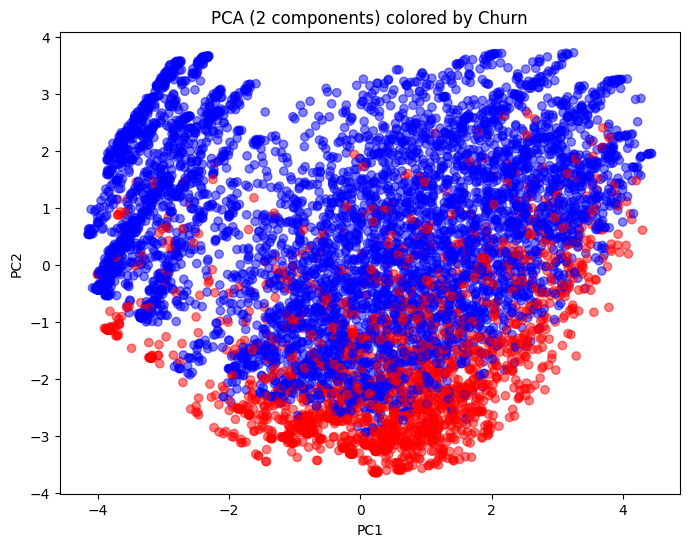

In [80]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X_full_transformed = preprocessor.fit_transform(X)
feature_names_full = get_feature_names(preprocessor)

# PCA to 2 components for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_full_transformed)

print("Explained variance ratios (2 components):", pca.explained_variance_ratio_)
# Визуализация
plt.figure(figsize=(8,6))
if 'Churn' in df_model.columns:
    palette = {0:'blue', 1:'red'}
    plt.scatter(X_pca[:,0], X_pca[:,1], c=df_model['Churn'].map(palette), alpha=0.5)
    plt.title('PCA (2 components) colored by Churn')
    plt.xlabel('PC1'); plt.ylabel('PC2')
    plt.show()
else:
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
    plt.title('PCA (2 components)')
    plt.show()


# **KMeans и Gaussian Mixture Models**

In [81]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

X_for_clust = X_full_transformed  # или X_pca

best_k = None
best_sil = -1
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_for_clust)
    sil = silhouette_score(X_for_clust, labels)
    print(f"K={k} silhouette={sil:.4f}")
    if sil > best_sil:
        best_sil = sil
        best_k = k
print("Best k by silhouette:", best_k)

kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
klabels = kmeans_best.fit_predict(X_for_clust)

gmm = GaussianMixture(n_components=best_k, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_for_clust)
print("GMM converged:", gmm.converged_)

if 'Churn' in df_model.columns:
    df_model['kmeans_cluster'] = klabels
    display(pd.crosstab(df_model['kmeans_cluster'], df_model['Churn']))
    df_model['gmm_cluster'] = gmm_labels
    display(pd.crosstab(df_model['gmm_cluster'], df_model['Churn']))


K=2 silhouette=0.1908
K=3 silhouette=0.1929
K=4 silhouette=0.2090
K=5 silhouette=0.2205
K=6 silhouette=0.1841
Best k by silhouette: 5
GMM converged: True


Churn,0,1
kmeans_cluster,,
0,498,125
1,1413,113
2,1405,1318
3,1841,259
4,17,54


Churn,0,1
gmm_cluster,,
0,17,54
1,1034,1102
2,1413,113
3,498,125
4,2212,475


# **Feature Selection**

In [82]:

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_selection import SelectFromModel

#Univariate selection
X_tr_trans = preprocessor.fit_transform(X_train)
selector = SelectKBest(score_func=f_classif, k=20)  # например 20 лучших
selector.fit(X_tr_trans, y_train)
mask = selector.get_support()
selected_features = [f for f, m in zip(feature_names_full, mask) if m]
print("Top features by univariate test:", selected_features)

# 2) L1-based selection
l1_logreg = LogisticRegressionCV(cv=3, penalty='l1', solver='saga', max_iter=1000)
l1_logreg.fit(X_tr_trans, y_train)
sfm = SelectFromModel(l1_logreg, prefit=True)
mask2 = sfm.get_support()
selected_l1 = [f for f, m in zip(feature_names_full, mask2) if m]
print("Selected by L1:", selected_l1)

# 3) Tree-based feature importances (already computed earlier)
display(feat_imp.head(30))


Top features by univariate test: ['tenure', 'MonthlyCharges', 'Churn_bin', 'InternetService__Fiber optic', 'InternetService__No', 'OnlineSecurity__No', 'OnlineSecurity__No internet service', 'OnlineBackup__No', 'OnlineBackup__No internet service', 'DeviceProtection__No', 'DeviceProtection__No internet service', 'TechSupport__No', 'TechSupport__No internet service', 'StreamingTV__No internet service', 'StreamingMovies__No internet service', 'Contract__Month-to-month', 'Contract__Two year', 'PaymentMethod__Electronic check', 'tenure_group__0-6', 'tenure_group__49-72']
Selected by L1: ['Churn_bin']


,feature,importance
0,Churn_bin,0.570299
1,Contract__Month-to-month,0.057850
2,PaymentMethod__Electronic check,0.038505
3,OnlineSecurity__No,0.032713
4,TechSupport__No,0.029116
5,tenure,0.028704
6,Contract__Two year,0.022179
7,TotalCharges,0.017985
8,InternetService__Fiber optic,0.016575
9,MonthlyCharges,0.016062


Сохранение моделей и быстрый pipeline

In [89]:
import joblib

joblib.dump(best_rf, 'best_random_forest_pipeline.joblib')
joblib.dump(pipeline_logreg, 'logreg_pipeline.joblib')
joblib.dump(grid_svm.best_estimator_ if 'grid_svm' in globals() else pipeline_svm, 'svm_pipeline.joblib')
print("Models saved.")


NameError: name 'pipeline_svm' is not defined

# **Dask**

In [85]:
import dask.dataframe as dd
from dask.distributed import Client

# Старт dask-кластера (локально)
client = Client(n_workers=2, threads_per_worker=2, memory_limit='2GB')
print(client)


ddf = dd.from_pandas(df, npartitions=4)
display(ddf.head())

mean_tenure = ddf['tenure'].mean().compute()
print("Mean tenure (dask):", mean_tenure)

try:
    import dask_ml.preprocessing as dpp
    scaler = dpp.StandardScaler()

    print("dask-ml доступен")
except Exception as e:
    print("dask-ml не доступен или не установлен:", e)


/usr/local/lib/python3.12/dist-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46767 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:38115
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:46767/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38525'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44993'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:40633 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40633
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:45398
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:36817 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:36817
IN

<Client: 'tcp://127.0.0.1:38115' processes=2 threads=4, memory=3.73 GiB>


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Mean tenure (dask): 32.37114865824223
dask-ml доступен


# **Streamlight**

In [86]:
!pip install streamlit pyngrok --quiet

In [87]:
streamlit_code = """
import streamlit as st
st.title('Hello Streamlit!')

st.write('Пример приложения Streamlit в Colab')
"""

with open('streamlit_app.py','w') as f:
    f.write(streamlit_code)


In [88]:
from pyngrok import ngrok

# Запускаем Streamlit через команду в Colab
!streamlit run streamlit_app.py &

# Пробрасываем порт 8501
public_url = ngrok.connect(port='8501')
public_url





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.82.24:8501



INFO:distributed.nanny:Closing Nanny gracefully at 'tcp://127.0.0.1:38525'. Reason: worker-close
INFO:distributed.nanny:Closing Nanny gracefully at 'tcp://127.0.0.1:44993'. Reason: worker-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:45414; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:45398; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:36817 name: 0 (stimulus_id='handle-worker-cleanup-1756205312.508123')
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:40633 name: 1 (stimulus_id='handle-worker-cleanup-1756205312.5166059')
INFO:distributed.scheduler:Lost all workers


  Stopping...


ERROR:pyngrok.process.ngrok:t=2025-08-26T10:48:33+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-26T10:48:33+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-26T10:48:33+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.